    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Decision Tree Accuracy: 0.84
Logistic Regression Accuracy: 0.86
Ridge Regression MSE: 0.10
Ridge Regression R²: 0.56
Lasso Regression MSE: 0.23
Lasso Regression R²: -0.00
XGBoost MSE: 0.07
XGBoost R²: 0.68


<Figure size 1000x600 with 0 Axes>

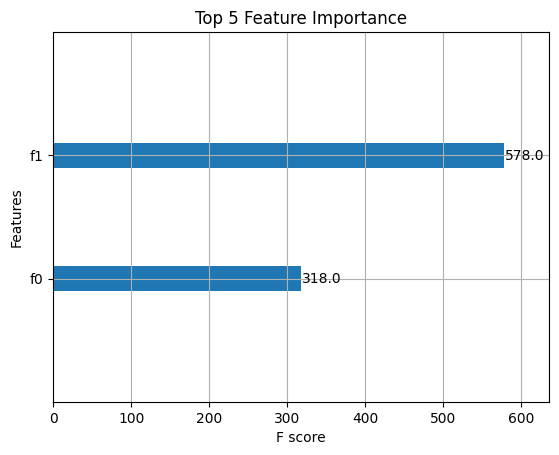

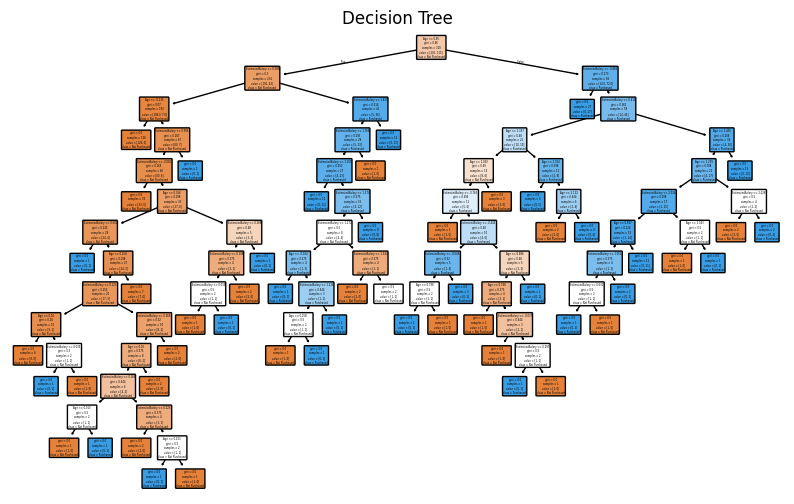

In [4]:
# https://www.kaggle.com/datasets/akram24/social-network-ads?resource=download


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import xgboost as xgb

# Define the path to your dataset (change this to the actual file path)
dataset_path = "C:/Users/hp/Downloads/social_network_ads.csv"  # For example, change this path

# Load the dataset
df = pd.read_csv(dataset_path)

# Check the first few rows of the dataset to ensure it's loaded correctly
print(df.head())

# Split the data into features (X) and target (y)
X = df[['Age', 'EstimatedSalary']]  # Features
y = df['Purchased']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Decision Tree Model ----
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Decision Tree Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# ---- Logistic Regression ----
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Logistic Regression Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# ---- Ridge Regression ----
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Ridge Regression MSE and R²
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Ridge Regression R²: {r2_ridge:.2f}")

# ---- Lasso Regression ----
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Lasso Regression MSE and R²
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Lasso Regression R²: {r2_lasso:.2f}")

# ---- XGBoost Regression ----
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # Binary classification for 'Purchased'
    'eval_metric': 'logloss',
    'seed': 42
}

xgboost_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgboost_model.predict(dtest)

# XGBoost MSE and R²
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.2f}")

# ---- Feature Importance Visualization ----
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgboost_model, importance_type='weight', max_num_features=5, title='Top 5 Feature Importance')
plt.show()

# ---- Plot Decision Tree ----
plt.figure(figsize=(10, 6))
plot_tree(dt_model, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'], rounded=True)
plt.title("Decision Tree")
plt.show()


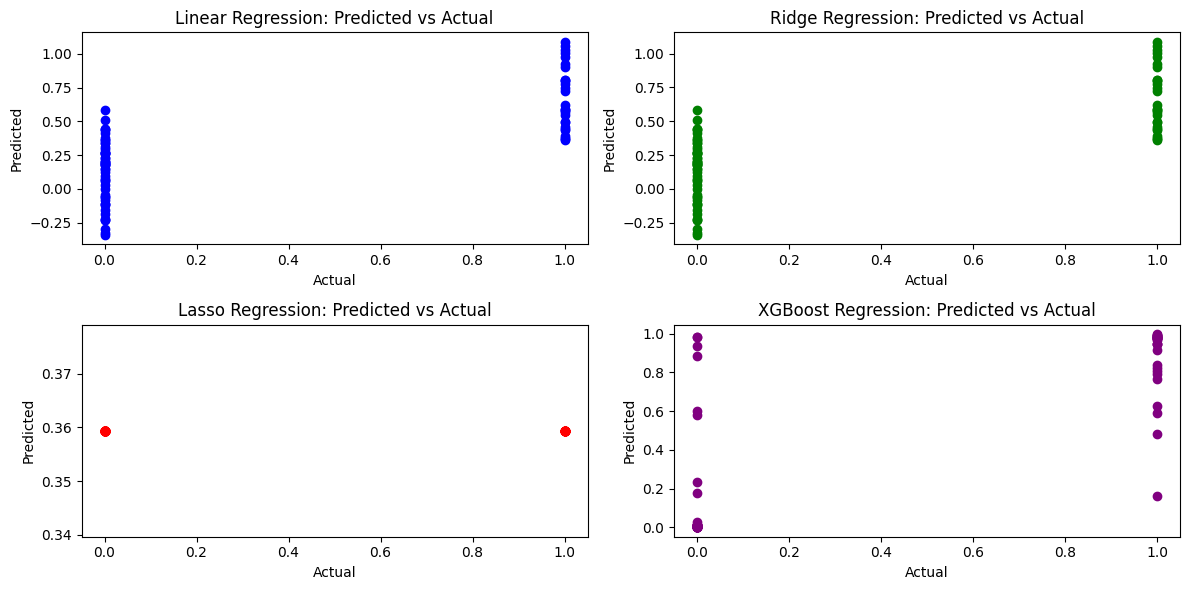

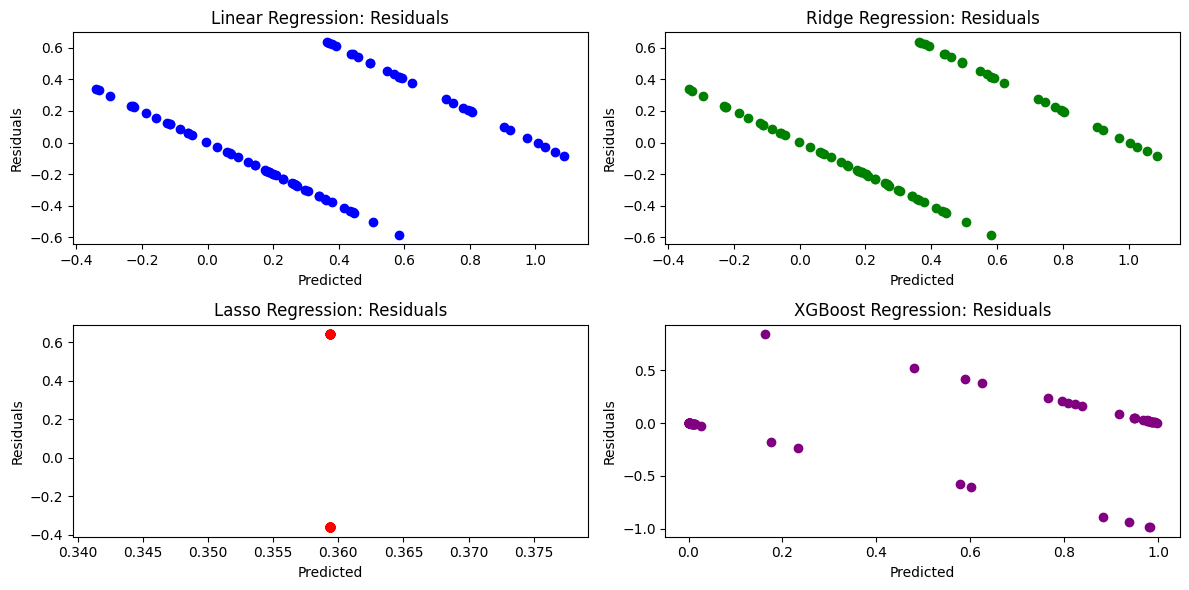

<Figure size 1000x600 with 0 Axes>

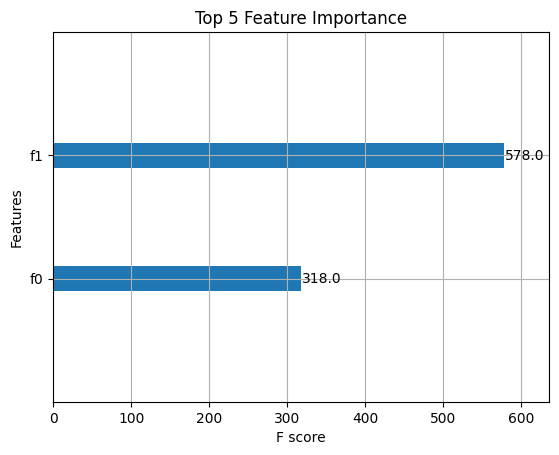

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

# Define the path to your dataset (change this to the actual file path)
dataset_path = "C:/Users/hp/Downloads/social_network_ads.csv"  # For example, change this path

# Load the dataset
df = pd.read_csv(dataset_path)

# Split the data into features (X) and target (y)
X = df[['Age', 'EstimatedSalary']]  # Features
y = df['Purchased']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Linear Regression ----
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# ---- Ridge Regression ----
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# ---- Lasso Regression ----
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# ---- XGBoost Regression ----
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # Binary classification for 'Purchased'
    'eval_metric': 'logloss',
    'seed': 42
}

xgboost_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgboost_model.predict(dtest)

# ---- Plotting Predicted vs Actual ----
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Ridge Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green')
plt.title('Ridge Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Lasso Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_lasso, color='red')
plt.title('Lasso Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_xgb, color='purple')
plt.title('XGBoost Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# ---- Plotting Residuals ----
plt.figure(figsize=(12, 6))

# Linear Regression Residuals
plt.subplot(2, 2, 1)
residuals_linear = y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals_linear, color='blue')
plt.title('Linear Regression: Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Ridge Regression Residuals
plt.subplot(2, 2, 2)
residuals_ridge = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals_ridge, color='green')
plt.title('Ridge Regression: Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Lasso Regression Residuals
plt.subplot(2, 2, 3)
residuals_lasso = y_test - y_pred_lasso
plt.scatter(y_pred_lasso, residuals_lasso, color='red')
plt.title('Lasso Regression: Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# XGBoost Regression Residuals
plt.subplot(2, 2, 4)
residuals_xgb = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals_xgb, color='purple')
plt.title('XGBoost Regression: Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# ---- XGBoost Feature Importance Visualization ----
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgboost_model, importance_type='weight', max_num_features=5, title='Top 5 Feature Importance')
plt.show()
